# Homework: Employee Analytics (NumPy + pandas + Matplotlib)

**Total: 100 points** • **Questions: 15**

This homework uses one dataset: **employee_data** (CSV). You will practice:

- NumPy arrays + vectorized operations
- pandas Series/DataFrame operations (filtering, cleaning, `groupby`, aggregates, pivots)
- Matplotlib plotting (pyplot + OO-style where appropriate)

**Dataset columns (expected):**

`Employee_ID, Age, Salary, Gender, Department, Experience, Education, Performance_Score, Working_Hours, City, Country, Years_in_Company, Previous_Company, Annual_Bonus, Join_Date, Name`

> You may assume `Employee_ID` is unique.


## Instructions (important)

- Use **pandas** for table operations, and **NumPy** for vectorized computations where asked.
- Do **not** hard-code answers; compute them from the data.
- Unless specified, treat missing values carefully (e.g., `NaN` in Hire Date/Bonus).
- Most questions ask you to create specific variables. **Name them exactly** as requested.
- Plots must have: title, axis labels, and readable tick labels.
- If you're using Google Colab, you need to upload the downloaded dataset to your Colab Files section.

### Grading

This notebook uses autograding:

- **Answer cells** are marked as `# YOUR CODE HERE` and will be graded.
- Remove `raise NotImplementedError()` once you start working on a solution.
- Only write your code where instructed. DO NOT ADD or REMOVE any cells. This may break the notebook.
- Do not edit the content of LOCKED cells.
- Besides the sanity check tests visible to you, we might use additional rigorous hidden tests that are only available after submission. Double-check your work for accuracy and do not rely on sanity checks.
- This notebook contains metadata and tracking.
- If anything breaks, save your work and download a fresh copy of the notebook from Canvas. You can copy your finished code and insert individually into appropriate cells of the new copy.


In [ ]:
# Setup
import hashlib
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

SALT = b"ml_io_hw2"


def dataframe_digest(df: pd.DataFrame) -> str:
    """
    Returns hexdigest of the hashed value of a given pands dataframe.
    """
    row_hashes = pd.util.hash_pandas_object(df, index=True)
    h = hashlib.sha256()
    h.update(row_hashes.values.tobytes())
    return h.hexdigest()


def hash_float(x, *, decimals=6, salt=SALT) -> str:
    """
    Hash a scalar float in a stable, tolerance-aware way.
    """
    x = float(np.round(x, decimals))
    h = hashlib.sha256()
    h.update(salt)
    h.update(np.float64(x).tobytes())
    return h.hexdigest()


def hash_value_counts(vc: pd.Series, *, salt=SALT) -> str:
    """
    Stable hash for value_counts() output.
    Order-insensitive and index-aware.
    """
    vc = vc.sort_index()
    row_hashes = pd.util.hash_pandas_object(vc, index=True).to_numpy(dtype=np.uint64)
    h = hashlib.sha256()
    h.update(salt)
    h.update(row_hashes.tobytes())
    return h.hexdigest()


pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 140)

warnings.filterwarnings("ignore", category=FutureWarning)


## Load the dataset

Place your CSV in the same folder as this notebook and name it **`employee_data.csv`**.

If your file has a different name, change `DATA_PATH` accordingly.


In [ ]:
DATA_PATH = "employee_data.csv"

# Load
df = pd.read_csv(DATA_PATH)


# Basic cleanup: strip whitespace in column names and some string fields
df.columns = df.columns.str.strip()
for col in [
    "City",
    "Country",
    "Department",
    "Gender",
    "Education",
    "Name",
    "Previous_Company",
]:
    if col in df.columns:
        df[col] = df[col].astype("string").str.strip()

# Parse dates
if "Join_Date" in df.columns:
    df["Join_Date"] = pd.to_datetime(df["Join_Date"], errors="coerce")

assert (
    dataframe_digest(df)
    == "aeb852f872aa59e9be8e8afa192617ced6070fe7a45a30c02b6f7f158457a9bd"
), (
    "Your dataframe was not loaded correctly. Ensure your .csv file is not corrupted and try again."
)

df.head()

,Employee_ID,Age,Salary,Gender,Department,Experience,Education,Performance_Score,Working_Hours,City,Country,Years_in_Company,Previous_Company,Annual_Bonus,Join_Date,Name
0,1,56,37954.0,Female,HR,16,PhD,5.0,48.0,Liverpool,UK,9,'Liverpool FC (Retail)',4827.0,2020-01-04,'Jeffrey Knight'
1,2,46,94373.0,Female,HR,16,Master,4.0,35.0,Ottawa,Canada,1,Telesat,13801.0,2018-02-13,'Nichole Robinson'
2,3,32,99906.0,Female,IT,4,'High School',4.0,58.0,Munich,Germany,2,Allianz,7159.0,2012-08-24,'Theresa Thompson'
3,4,25,42368.0,Female,IT,5,PhD,2.0,40.0,Munich,Germany,4,Siemens,18094.0,2019-02-13,'Clifford Nunez'
4,5,38,77288.0,Male,Sales,15,PhD,1.0,34.0,Munich,Germany,12,BMW,10122.0,2016-07-09,'Gary Coleman'


---

# Part A — Data understanding & cleaning (30 points)

### Q1 (4 pts) — Basic structure

Create the following variables:

- `n_rows`: number of rows
- `n_cols`: number of columns
- `colnames`: list of column names in order

**Hint:** `df.shape`, `df.columns`.


In [ ]:
# n_rows = ...
# n_cols = ...
# colnames = ...

# Be sure to remove raise NotImplementedError()
# YOUR CODE HERE

n_rows = df.shape[0]
n_cols = df.shape[1]
colnames = df.columns.tolist()

In [ ]:
assert isinstance(n_rows, int) and n_rows > 0
assert isinstance(n_cols, int) and n_cols > 0
assert isinstance(colnames, list) and len(colnames) == n_cols


### Q2 (6 pts) — Clean numeric columns

Ensure these columns are numeric (float or int), coercing errors to missing:

- `Salary`
- `Annual_Bonus`
- `Working_Hours`
- `Performance_Score`
- `Age`

Store the cleaned DataFrame as `df_clean` (do not overwrite `df`).

**Hint:** `pd.to_numeric(..., errors="coerce")`


In [ ]:
df_clean = ...

# YOUR CODE HERE

df_clean = df.copy()

#these are the specific columns to target as per instructions
numeric_cols = ['Salary', 'Annual_Bonus', 'Working_Hours', 'Performance_Score', 'Age']

#the loop that cleans and coerce
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

In [ ]:
assert isinstance(df_clean, pd.DataFrame), "df_clean must be a pandas DataFrame"


In [ ]:
assert (
    dataframe_digest(df)
    == "aeb852f872aa59e9be8e8afa192617ced6070fe7a45a30c02b6f7f158457a9bd"
), (
    "The original dataframe is manpulated. Make sure you create new deep copies of dataframe and do not write back on it."
)

### Q3 (6 pts) — Missingness report

Create a DataFrame `missing_report` with columns:

- `missing_count`
- `missing_pct`

for every column in `df_clean`, sorted by `missing_pct` descending.

**Hint:** `isna().sum()`, divide by `len(df_clean)`.


In [ ]:
# You can first calculate and store the values of the columns in separate objects as intermediary step.
# missing_count = ...
# missing_pct = ...
# missing_report = ...

# YOUR CODE HERE

missing_count = df_clean.isna().sum()
missing_pct = (df_clean.isna().sum() / len(df_clean)) * 100

missing_report = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct': missing_pct })

# Sort by missing_pct descending
missing_report = missing_report.sort_values('missing_pct', ascending=False)


In [ ]:
assert isinstance(missing_report, pd.DataFrame)
assert (
    "missing_count" in missing_report.columns
    and "missing_pct" in missing_report.columns
)
assert missing_report.index.is_unique, (
    "the row index values of missing_report should be unique"
)

assert (
    hash_float(missing_report.sum()["missing_count"])
    == "ef9433bbeb1b4ee2103c0d6027351186102cb9ed8c18845575814fc3c9c454dc"
), "missing_count is not accurate."
assert (
    hash_float(missing_report.sum()["missing_pct"])
    == "4948daac02cee6d9928777e1a14764fc745fe1cc7ff431601132b8cd08564961"
), "missing_pct is not accurate"

### Q4 (7 pts) — Create derived features

Add the following columns to `df_clean`:

1. `Total_Comp` = `Salary` + `Annual_Bonus` (treat missing bonus as 0; missing salary should remain NaN)
2. `Overtime` = `Working_Hours` - 40 (but minimum 0; if Working_Hours is missing, Overtime should be NaN)
3. `Tenure_Bucket` based on `Years_in_Company`:
   - `"0-2"`, `"3-5"`, `"6-10"`, `"11+"`

Return the updated DataFrame as `df_feat`.

**Hints:**

- Bonus fill: `df["Annual_Bonus"].fillna(0)`
- For minimum 0: `np.maximum(...)`
- Buckets: `pd.cut(...)` or `np.select(...)`


In [ ]:
df_feat = df_clean.copy()

# YOUR CODE HERE
#salary
df_feat['Total_Comp'] = df_feat['Salary'] + df_feat['Annual_Bonus'].fillna(0)
#ot
df_feat['Overtime'] = np.maximum(df_feat['Working_Hours'] - 40, 0)

#function for assigning tenure
def tenureBucket(years):
    if years <= 2:
        return "0-2"
    elif years <= 5:
        return "3-5"
    elif years <= 10:
        return "6-10"
    else:
        return "11+"
#tenure
df_feat['Tenure_Bucket'] = df_feat['Years_in_Company'].apply(tenureBucket)

In [ ]:
assert isinstance(df_feat, pd.DataFrame)
assert all(c in df_feat.columns for c in ["Total_Comp", "Overtime", "Tenure_Bucket"]), (
    "All requested columns must be present in df_feat"
)

In [ ]:
assert (
    hash_float(df_feat["Total_Comp"].sum())
    == "66d803c4b4973e37762a2b1e4cd054aaec6b36288e18f1cbb83776b4604b5743"
), "Total_Comp values are not accurate."

assert (
    hash_float(df_feat["Overtime"].sum())
    == "ed09a59c80f1d2100797e9044eddda9697d021b70eb0fd51329f35179663e4e4"
), "Overtime values are not accurate."

In [ ]:
vc = (
    df_feat["Tenure_Bucket"]
    .value_counts()
    .reindex(["0-2", "3-5", "6-10", "11+"], fill_value=0)
)
assert (
    hash_value_counts(vc)
    == "c01867a9d50354bd6f66490c6f255825b3c056b7a4cde43d128e390710ea0f9f"
), "Tenure_Bucket distribution is not accurate."

### Q5 (7 pts) — Fix whitespace & categories

Create a DataFrame `df_cat` where:

- `Gender`, `Department`, `Country` are converted to pandas `category` dtype
- `City` is stripped of whitespace

Return `df_cat`.

**Hint:** `astype("category")`


In [ ]:
df_cat = df_feat.copy()

# YOUR CODE HERE
#assigning categories
df_cat['Gender'] = df_cat['Gender'].astype('category')
df_cat['Department'] = df_cat['Department'].astype('category')
df_cat['Country'] = df_cat['Country'].astype('category')

#stippring whitespace
df_cat['City'] = df_cat['City'].str.strip()

df_cat.head()

,Employee_ID,Age,Salary,Gender,Department,Experience,Education,Performance_Score,Working_Hours,City,Country,Years_in_Company,Previous_Company,Annual_Bonus,Join_Date,Name,Total_Comp,Overtime,Tenure_Bucket
0,1,56,37954.0,Female,HR,16,PhD,5.0,48.0,Liverpool,UK,9,'Liverpool FC (Retail)',4827.0,2020-01-04,'Jeffrey Knight',42781.0,8.0,6-10
1,2,46,94373.0,Female,HR,16,Master,4.0,35.0,Ottawa,Canada,1,Telesat,13801.0,2018-02-13,'Nichole Robinson',108174.0,0.0,0-2
2,3,32,99906.0,Female,IT,4,'High School',4.0,58.0,Munich,Germany,2,Allianz,7159.0,2012-08-24,'Theresa Thompson',107065.0,18.0,0-2
3,4,25,42368.0,Female,IT,5,PhD,2.0,40.0,Munich,Germany,4,Siemens,18094.0,2019-02-13,'Clifford Nunez',60462.0,0.0,3-5
4,5,38,77288.0,Male,Sales,15,PhD,1.0,34.0,Munich,Germany,12,BMW,10122.0,2016-07-09,'Gary Coleman',87410.0,0.0,11+


In [ ]:
for c in ["Gender", "Department", "Country"]:
    assert c in df_cat.columns
    assert str(df_cat[c].dtype) == "category"

---

# Part B — Analysis with aggregations & groupby (45 points)

### Q6 (6 pts) — Department salary summary

Create `dept_salary_summary` as a DataFrame indexed by `Department` with columns:

- `count` (non-missing salaries)
- `mean_salary`
- `median_salary`

Sorted by `mean_salary` descending.

**Hint:** `groupby("Department")["Salary"].agg(...)`


In [ ]:
# dept_salary_summary = ...
# YOUR CODE HERE

#assuming we are using df_cat
dept_salary_summary = df_cat.groupby('Department')['Salary'].agg([
    ('count', 'count'),
    ('mean_salary', 'mean'),
    ('median_salary', 'median')]).sort_values('mean_salary', ascending=False)

In [ ]:
assert isinstance(dept_salary_summary, pd.DataFrame)
for c in ["count", "mean_salary", "median_salary"]:
    assert c in dept_salary_summary.columns, (
        f"column {c} not found in dept_salary_summary dataframe"
    )


In [ ]:
assert (
    hash_float(dept_salary_summary.loc["Marketing"].sum())
    == "2ff80081f15c05cadd08c9cedd95ed74111e173f4e43ddcb5383549b632f360a"
)
assert (
    hash_float(dept_salary_summary.loc["Finance"].sum())
    == "1b085536b0fe25b3f66022671c0146b13ad2e3114b0b4799ca071647dd37f7ca"
)
assert (
    hash_float(dept_salary_summary.loc["IT"].sum())
    == "45c0c84028dbd3f7f5d4137bbdb6a4bd7286a92e549795ec6027567473fa8f47"
)

assert (
    hash_float(dept_salary_summary.sum()["count"])
    == "5e59c5099a5ab591bd34d44c644824a0871b537a57134b9dafb725891a12b25f"
)
assert (
    hash_float(dept_salary_summary.sum()["mean_salary"])
    == "55346e7db096f48a134943698dedf67d3e0d2fb3a97f13e2693972f05e40f229"
)
assert (
    hash_float(dept_salary_summary.sum()["median_salary"])
    == "5ed6f2e6b9aa8bb00458bd2604cead292a9578028617c9c4538d26cfa202d1f0"
)

### Q7 (7 pts) — Gender pay gap by department

Compute a table `pay_gap_dept` with one row per department and columns:

- `female_mean_salary`
- `male_mean_salary`
- `gap_m_minus_f` = male_mean_salary - female_mean_salary

Departments missing either gender should still appear (gap can be NaN).

**Hint:** `pivot_table(index="Department", columns="Gender", values="Salary", aggfunc="mean")`


In [ ]:
# This template is just a suggestion but there are many ways to achieve this.
# pt = df_cat.pivot_table(...) # You can first create a pivot table ...
# pay_gap_dept = ...

# YOUR CODE HERE

#pivot table using parameters given
pt = df_cat.pivot_table(
    index='Department',
    columns='Gender',
    values='Salary',
    aggfunc='mean'
)

#creating df
pay_gap_dept = pd.DataFrame({
    'female_mean_salary': pt.get('Female'),
    'male_mean_salary': pt.get('Male')
})

#creating column for df
pay_gap_dept['gap_m_minus_f'] = pay_gap_dept['male_mean_salary'] - pay_gap_dept['female_mean_salary']

In [ ]:
assert isinstance(pay_gap_dept, pd.DataFrame)
for c in ["female_mean_salary", "male_mean_salary", "gap_m_minus_f"]:
    assert c in pay_gap_dept.columns, f"column {c} not found in pay_gap_dept dataframe"


In [ ]:
assert (
    hash_float(pay_gap_dept["female_mean_salary"].sum())
    == "f7a01ef2b10dae0100b76b50abfb3bb3ded638522d0d57bfe9b974ffe7fb09a5"
), "female_mean_salary is not accurate"
assert (
    hash_float(pay_gap_dept["male_mean_salary"].sum())
    == "5e4a1900fe96c402205b5a310650ffa5ed2a40f80dda494da4c6c2fe3d1cb124"
), "male_mean_salary is not accurate"
assert (
    hash_float(pay_gap_dept["gap_m_minus_f"].sum())
    == "183790c1c5c7f12e733348905d3512d20074326d7293800bd3dd1a629fcc3d77"
), "gap_m_minus_f is not accurate"


### Q8 (7 pts) — Top earners per department [DEMO]

_This question is for exploration purposes only. Everyone will receive 7 points. Be sure to run the cell._

Create a DataFrame `top_earners` containing the **top 3** employees by `Total_Comp` within each `Department`.

Keep these columns (at least):
`Employee_ID, Name, Department, Salary, Annual_Bonus, Total_Comp`

Sort results by `Department` then `Total_Comp` descending.


In [ ]:
cols = ["Employee_ID", "Name", "Department", "Salary", "Annual_Bonus", "Total_Comp"]
tmp = df_cat[cols].sort_values(["Department", "Total_Comp"], ascending=[True, False])
top_earners = tmp.groupby("Department", group_keys=False).head(3).reset_index(drop=True)

# Be sure to remove raise NotImplementedError()
# YOUR CODE HERE

top_earners.head()

,Employee_ID,Name,Department,Salary,Annual_Bonus,Total_Comp
0,31398,'Wanda Shepherd',Finance,494683.0,10562.0,505245.0
1,34187,'Ricardo Brady',Finance,460723.0,5179.0,465902.0
2,90125,'Anita Palmer',Finance,454754.0,7539.0,462293.0
3,8289,'Alexis Nguyen',HR,489739.0,12720.0,502459.0
4,12055,'Priscilla Kim',HR,489049.0,4362.0,493411.0


In [ ]:
assert isinstance(top_earners, pd.DataFrame)
assert top_earners.groupby("Department").size().max() <= 3
for c in ["Employee_ID", "Name", "Department", "Total_Comp"]:
    assert c in top_earners.columns

### Q9 (6 pts) — Correlation: Salary vs Performance [DEMO]

_This question is for exploration purposes only. Everyone will receive 6 points. Be sure to run the cell._

1. Compute overall Pearson correlation between `Salary` and `Performance_Score` as `corr_overall`.
2. Compute per-department correlations as a Series `corr_by_dept` indexed by department.

**Hints:**

- Overall: `df_cat[["Salary","Performance_Score"]].corr()` and extract the correlation from the resulting covariance matrix.
- By group: `groupby("Department").apply(lambda g: g["Salary"].corr(g["Performance_Score"]))` lambda functions are further exploration and advanced topic.


In [ ]:
corr_overall = df_cat[["Salary", "Performance_Score"]].corr().iloc[0, 1]
corr_by_dept = df_cat.groupby("Department").apply(
    lambda g: g["Salary"].corr(g["Performance_Score"])
)
print(f"Overall correlation: {corr_overall:.3f}")
print("\nCorelation by Department:\n")
print(corr_by_dept)

# Be sure to remove raise NotImplementedError()
# YOUR CODE HERE

Overall correlation: 0.075

Corelation by Department:

Department
Finance      0.082351
HR           0.111863
IT           0.059492
Marketing    0.090191
Sales        0.028450
dtype: float64


/tmp/ipython-input-1362442829.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_by_dept = df_cat.groupby("Department").apply(


In [ ]:
assert isinstance(corr_by_dept, pd.Series)
assert np.isclose(corr_overall, 0.075343)

### Q10 (6 pts) — Hiring trends: employees per year

Create a DataFrame `hires_per_year` with columns:

- `year`
- `n_hired`

derived from `Join_Date` (drop missing dates). Sorted by `year` ascending.

**Hint:** `df["Join_Date"].dt.year` and `value_counts().sort_index()`


In [ ]:
# You can use a few intermediary/helper objects
# years = ...
# value_counts = ...
# hires_per_year = ...

# YOUR CODE HERE

years = df_cat['Join_Date'].dt.year
value_counts = years.value_counts().sort_index()

hires_per_year = pd.DataFrame({
    'year': value_counts.index,
    'n_hired': value_counts.values
})


In [ ]:
assert isinstance(hires_per_year, pd.DataFrame)
assert set(["year", "n_hired"]).issubset(hires_per_year.columns)

### Q11 (7 pts) — Overtime analysis by department [DEMO]

_This question is for exploration purposes only. Everyone will receive the 7 points. Be sure to run the cell._

Using `Overtime` from Q4, create `overtime_dept` indexed by `Department` with:

- `avg_overtime`
- `pct_overtime_workers` = percent of employees in the department with overtime > 0 (exclude missing Working_Hours)

Sort by `avg_overtime` descending.

**Hints:**

- For percent: `(g["Overtime"] > 0).mean() * 100` but watch missing values
- Consider `dropna()` on Overtime for the percent denominator


In [ ]:
# In function definition what comes after : and -> signs (in parameters and after function)
# are type hints. They simply remind you what type goes in the function and what type is returned.
# Here g is pd.DataFrame type and the function returns a float type.
def pct_overtime(g: pd.DataFrame) -> float:
    s = g["Overtime"].dropna()
    if len(s) == 0:
        return np.nan
    return (s > 0).mean() * 100


# Notice the use of lambda (advanced topic).
overtime_dept = (
    df_cat.groupby("Department")
    .apply(
        lambda g: pd.Series(
            {
                "avg_overtime": g["Overtime"].mean(),
                "pct_overtime_workers": pct_overtime(g),
            }
        )
    )
    .sort_values("avg_overtime", ascending=False)
)

# Be sure to remove raise NotImplementedError()
# YOUR CODE HERE

overtime_dept

/tmp/ipython-input-2930941959.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,avg_overtime,pct_overtime_workers
Department,,
IT,6.359601,63.536160
HR,6.357268,63.565658
Finance,6.337751,63.259192
Sales,6.333132,63.465501
Marketing,6.245760,62.644255


In [ ]:
assert isinstance(overtime_dept, pd.DataFrame)
for c in ["avg_overtime", "pct_overtime_workers"]:
    assert c in overtime_dept.columns

### Q12.1 (2 pts) — Education vs pay & performance

**A solution for this problem is mostly implemented. You will finish the solution and provide a written answer to the quesiton.**

We created a DataFrame `edu_summary` indexed by `Education` with:

- `n`
- `mean_salary`
- `mean_perf`

Sort this dataframe by `mean_salary` in descending order.


In [ ]:
edu_summary = df_cat.groupby("Education").agg(
    n=("Employee_ID", "count"),
    mean_salary=("Salary", "mean"),
    mean_perf=("Performance_Score", "mean"),
)
# YOUR CODE HERE

#sorting frame
edu_summary = edu_summary.sort_values('mean_salary', ascending=False)

In [ ]:
assert isinstance(edu_summary, pd.DataFrame)
for c in ["n", "mean_salary", "mean_perf"]:
    assert c in edu_summary.columns, f"Column {c} not found in edu_summary"


### Q12.2 (4 pts) - What are your observations from this table? Why do you think we're seeing this trend in data?

_You may need to double-click this cell to edit._

YOUR ANSWER HERE
- The observation that I am immediately seeing is that having a Bachelor's degree gives you a higher salary than that of high schoolers. I also notice that the mean pay of those with a Bachelors is higher (although slightly) than those with Masters or PhD. This could show that going for a masters or phd may not have the same ROI as the bachelors would.

- Perhaps we are seeing this trend as the employee data may have masters or phd as interns and they may be bringing the mean down. That is a possibility but more data may be needed. It could also be that those who have bachelor's have been in the workforce longer than those with Phd or Masters, hence they earn more by experience and not education.

---

# Part C — Visualization (25 points)

### Q13 (8 pts) — Salary distribution by department (boxplot)

Create a **single figure** showing a **boxplot** of `Salary` by `Department`.

Requirements:

- Use either OO-style or pyplot style.
- Title: `"Salary Distribution by Department"`
- X-axis label: `"Department"`
- Y-axis label: `"Salary"`


/tmp/ipython-input-887025579.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(dept_data, labels=df_cat['Department'].cat.categories)


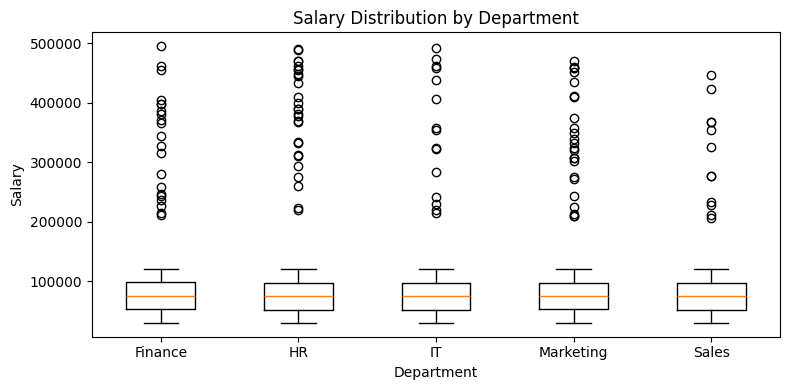

In [ ]:
# This is just a suggested layout using OO-style approach.
# Feel free to use any other layout or pyplot approach.
# fig_q13, ax = plt.subplots(figsize=(8, 4))

# YOUR CODE HERE

#personally this is my first time using OO-style boxplots, most of my experience has been in pyplot
fig_q13, ax = plt.subplots(figsize=(8, 4))

# Prepare data for boxplot
dept_data = [df_cat[df_cat['Department'] == dept]['Salary'].dropna()
             for dept in df_cat['Department'].cat.categories]

ax.boxplot(dept_data, labels=df_cat['Department'].cat.categories)
ax.set_title('Salary Distribution by Department')
ax.set_xlabel('Department')
ax.set_ylabel('Salary')
fig_q13.tight_layout()
fig_q13.show()

### Q14 (9 pts) — Trend plot: hires per year

Using `hires_per_year` from Q10, plot a line chart of `n_hired` vs `year`.

Requirements:

- Use **OO-style** (`fig, ax = plt.subplots()`)
- Markers visible on points
- Title: `"Employees Hired per Year"`
- X-axis label: `"Year"`
- Y-axis label: `"Number Hired"`

Store the Axes as `ax_q14`.


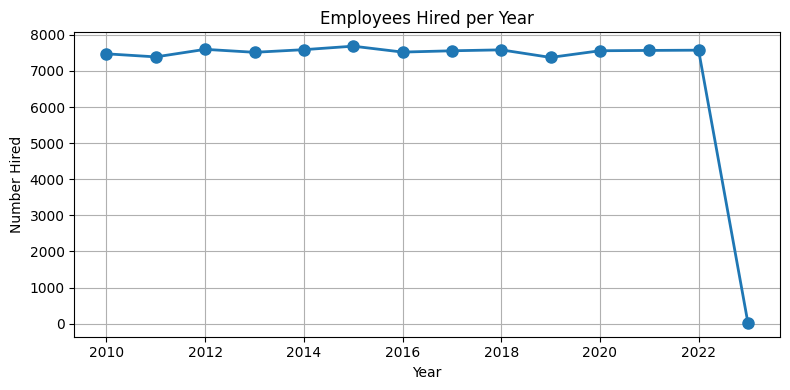

In [ ]:
# YOUR CODE HERE

fig_q14, ax_q14 = plt.subplots(figsize=(8, 4))

#plot
ax_q14.plot(hires_per_year['year'], hires_per_year['n_hired'],
            marker='o', linewidth=2, markersize=8)
ax_q14.set_title('Employees Hired per Year')
ax_q14.set_xlabel('Year')
ax_q14.set_ylabel('Number Hired')
ax_q14.grid(True)
fig_q14.tight_layout()
fig_q14.show()


### Q15 (8 pts) — Relationship plot: Salary vs Performance, colored by department

Create a scatter plot of `Salary` vs `Performance_Score`, with points colored by `Department`.

Requirements:

- Use Matplotlib (OO-style might be the better choice here)
- Include a legend with department names
- Title: `"Salary vs Performance (by Department)"`
- X-axis label: `"Salary"`
- Y-axis label: `"Performance Score"`

Store the figure as `fig_q15`.


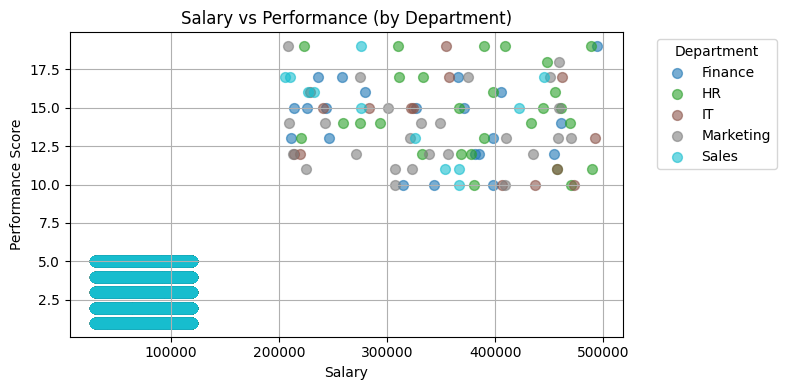

In [ ]:
# YOUR CODE HERE

fig_q15, ax = plt.subplots(figsize=(8, 4))

#giving each department a different color for the graph
departments = df_cat['Department'].cat.categories
colors = plt.cm.tab10(np.linspace(0, 1, len(departments)))

#to give each dot a different color per department
for dept, color in zip(departments, colors):
    dept_data = df_cat[df_cat['Department'] == dept]
    ax.scatter(dept_data['Salary'], dept_data['Performance_Score'],
               label=dept, alpha=0.6, s=50, color=color)

ax.set_title('Salary vs Performance (by Department)')
ax.set_xlabel('Salary')
ax.set_ylabel('Performance Score')

ax.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
fig_q15.tight_layout()
fig_q15.show()

---

## Submission checklist

- Restart kernel, run all cells top-to-bottom.
- Ensure **no errors**.
- Save notebook and submit the `.ipynb` file.
